In [1]:
import scipy
import numpy as np
import os
os.chdir('../..')
from functions import Database
os.getcwd()

class DatabaseStimuli(Database):
    """
    Loading neuronal, behavioural and stimuli data from matlab files 
    Inherits from Database class (without stimulus)

    The raw data was curated according to the following correspondence:
    data[0] is name
    data[1] is fps
    data[2] is Bleachcorrected_traces
    data[3] is deltaFOverF
    data[4] is deltaFOverF_bc
    data[5] is deriv_traces
    data[6] is zscored_traces
    data[7] is neuron names
    data[8] is 0,1,2 Response
    data[9] is 11, 21 Stimulus
    data[10] is 1,2,3,4 behaviour

    """
    
    def __init__(self, data_set_no : int):

        self.data_set_no = data_set_no
        data_dict = scipy.io.loadmat('data/raw/stimuli_data_jalaja/Alldataset_data_extracted.mat')
        data  = data_dict['All_neuron_data'][0, self.data_set_no]
        
        self.dataset_name = data[0][0]
        self.fps = data[1].flatten()[0]
        self.neuron_traces = data[3].T 
        self.response = data[8].flatten()
        self.stimulus = data[9].flatten()
        self.states = data[10].flatten()
        self.response_names = {0:'miss', 1:'hit', 2:'NaN (excluded trials)'}
        self.stimulus_names = {11:'11% oxygen', 21:'21% oxygen'}
        self.state_names = {1:'forward', 2:'reverse', 3:'sustained reversal', 4:'turn'}

        nn = data[7]       
        neuron_names=[] 
        for i in nn.flat:
            if i[0][0].size>0:
                neuron_names.append(i[0][0][0])
            else:
                neuron_names.append('0')
        self.neuron_names = np.array(neuron_names)


In [2]:
os.getcwd()

'/Users/aksheykumar/Desktop/BunDLe-Net'

13-10-21_w2_H_wbstructforPCA.mat.mat
3.270899470899471
(6182,)
(6182,)
(6182,)
(65,)
(65, 6182)


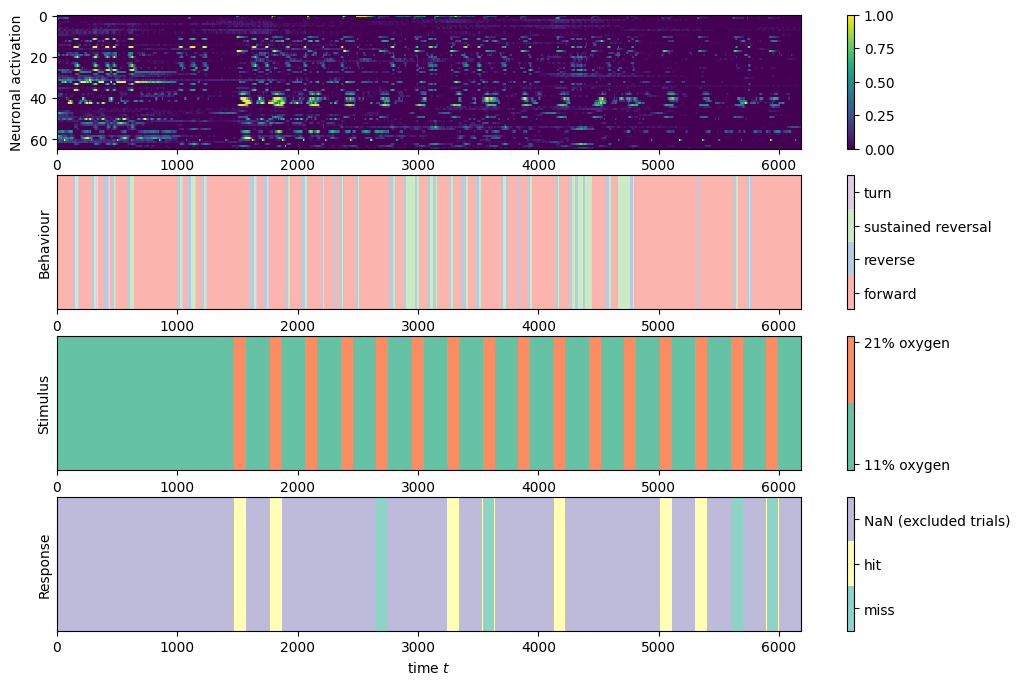

13-10-21_w3_H_wbstructforPCA.mat.mat
3.27037037037037
(6181,)
(6181,)
(6181,)
(66,)
(66, 6181)


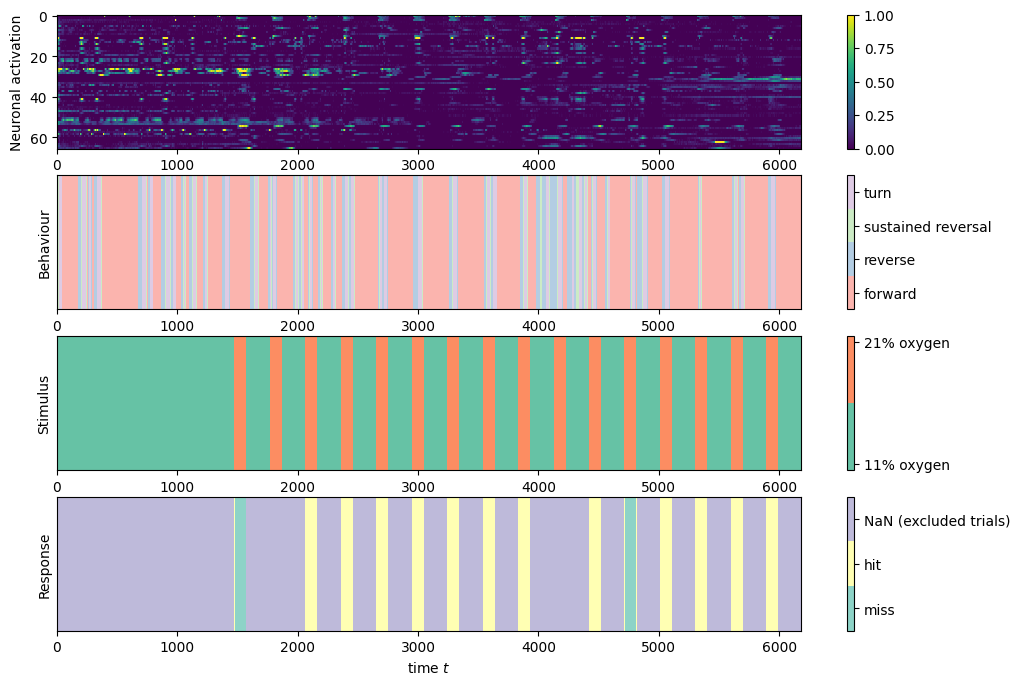

13-10-21_w4_H_wbstructforPCA.mat.mat
3.270899470899471
(6182,)
(6182,)
(6182,)
(63,)
(63, 6182)


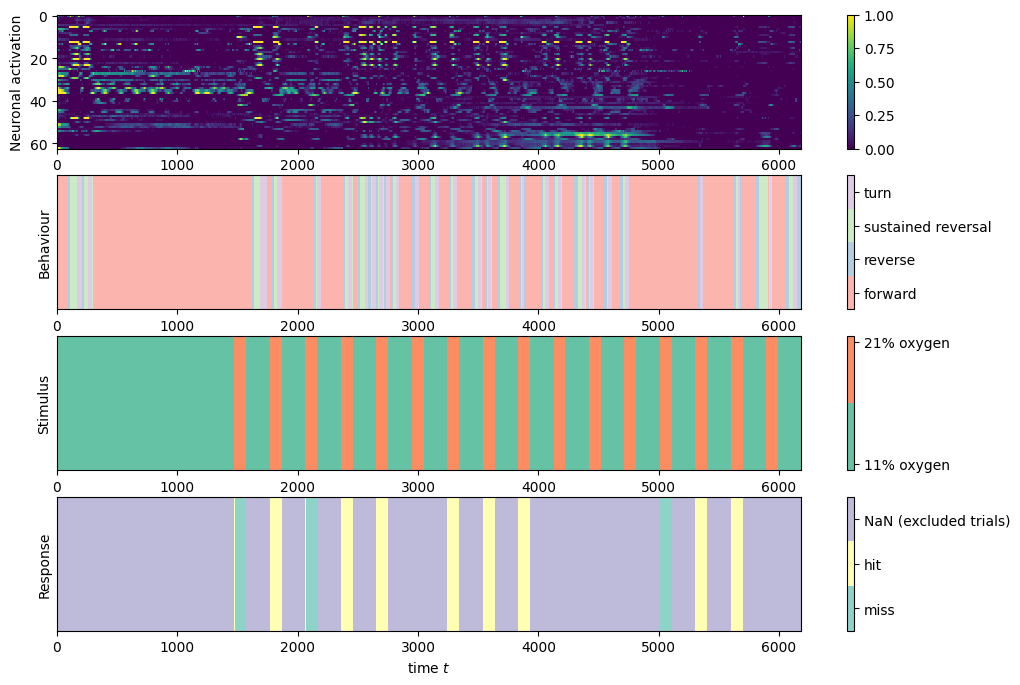

5-2-22_w5_H_wbstructforPCA.mat.mat
3.270899470899471
(6182,)
(6182,)
(6182,)
(76,)
(76, 6182)


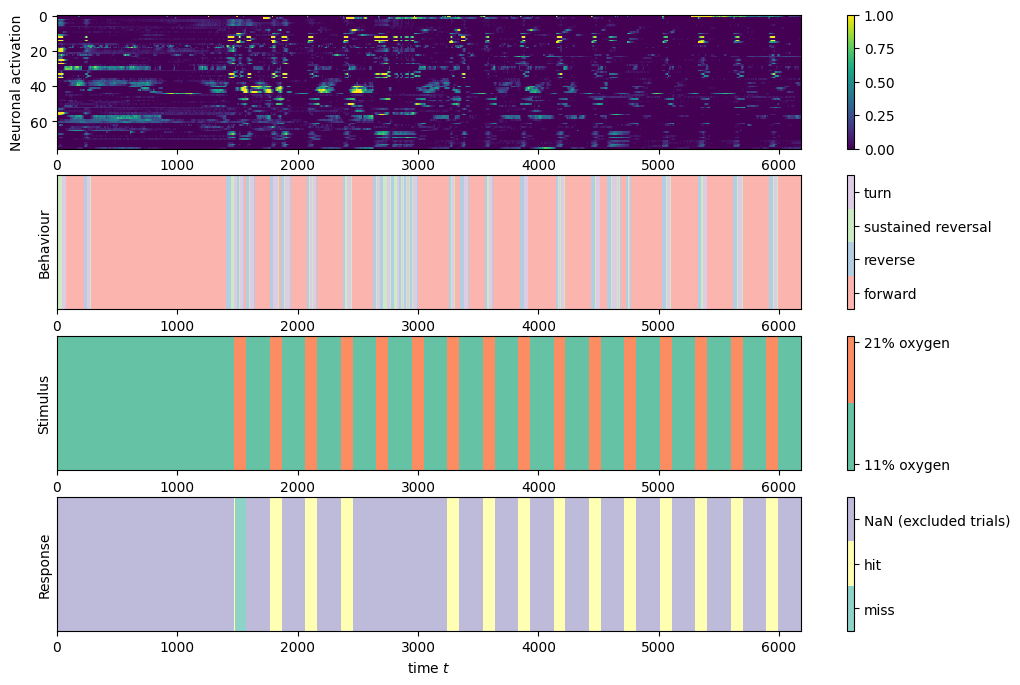

5-2-22_w7_H_wbstructforPCA.mat.mat
3.270899470899471
(6182,)
(6182,)
(6182,)
(135,)
(135, 6182)


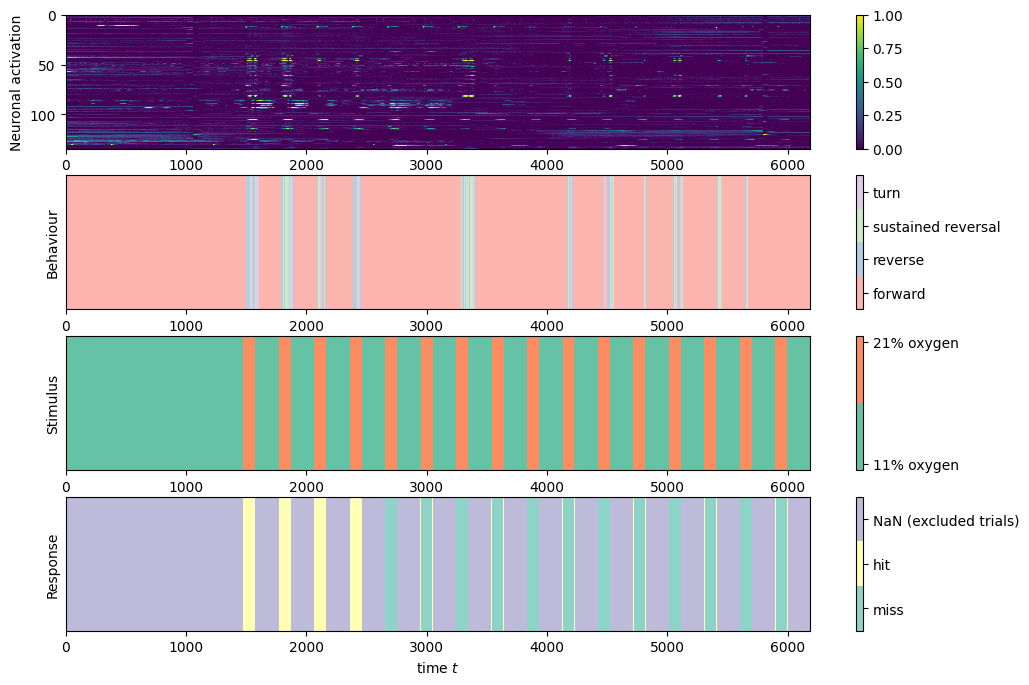

5-2-22_w9_H_wbstructforPCA.mat.mat
3.270899470899471
(6182,)
(6182,)
(6182,)
(73,)
(73, 6182)


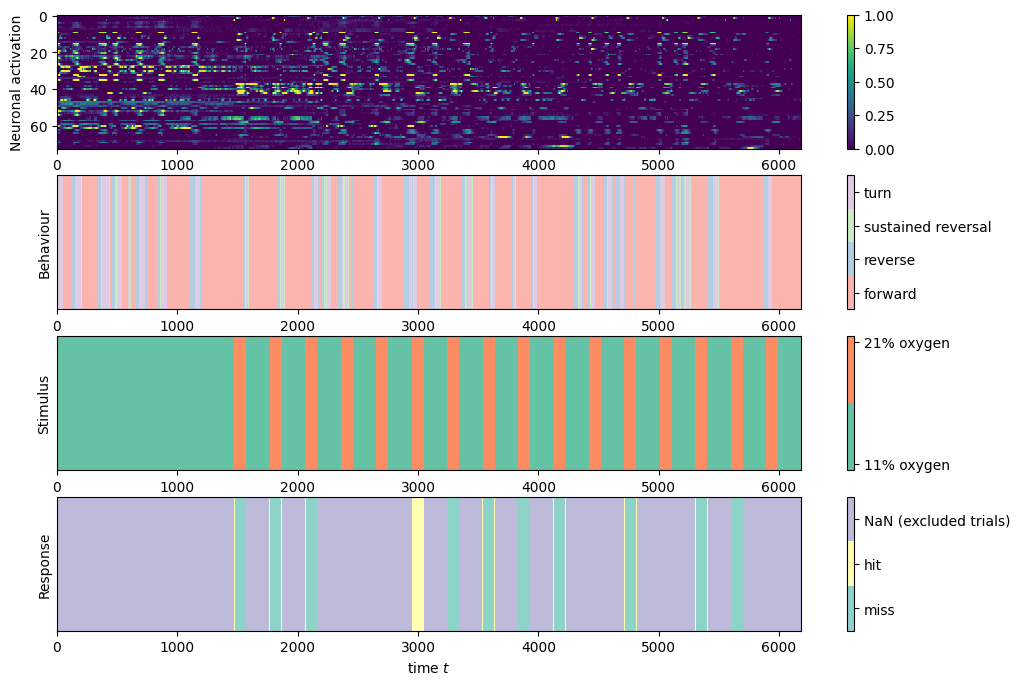

9-10-21_w1_H_wbstructforPCA.mat.mat
3.27037037037037
(6181,)
(6181,)
(6181,)
(68,)
(68, 6181)


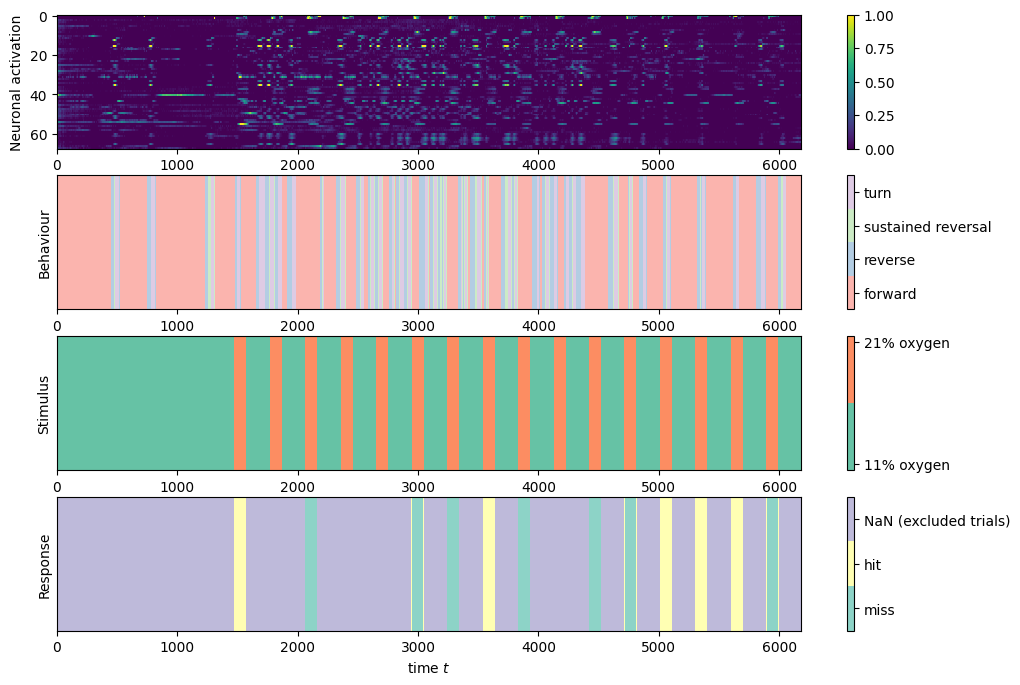

9-10-21_w3_H_wbstructforPCA.mat.mat
3.27037037037037
(6181,)
(6181,)
(6181,)
(63,)
(63, 6181)


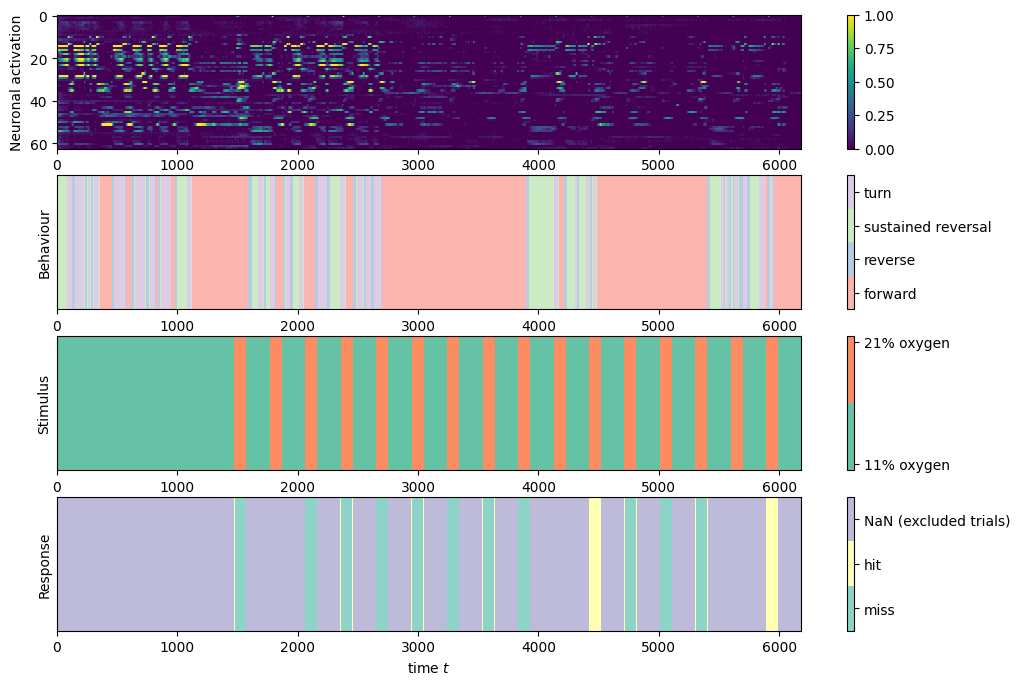

In [6]:
from src.data_loading import DatabaseStimuli
from src.utils import plotting_neuronal_behavioural
import numpy as np

    
b_neurons = [
    'AVAR',
    'AVAL'
]

data = DatabaseStimuli(data_set_no=1)

for i in range(8):
    data = DatabaseStimuli(data_set_no=i)
    print(data.dataset_name)
    print(data.fps)
    print(data.stimulus.shape)
    print(data.response.shape)
    print(data.states.shape)
    print(data.neuron_names.shape)
    print(data.neuron_traces.shape)
    plotting_neuronal_behavioural(data.neuron_traces.T, data.states, data.state_names, data.stimulus, data.stimulus_names, data.response, data.response_names, vmin=0, vmax=1)


In [ ]:
data.categorise_neurons()